# Forecasting Sales
We are given a series of sales data and the corresponding sales budgets we wish to achieve at the same time. We would like to tell the future and predict that whether we will hit our expected volume of sales / sales budget in the upcoming months.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## larger figures
plt.rcParams['figure.figsize'] = [9, 7]

In [2]:
file = r'Monthly Sales for Laptops - Test.xlsx'
df = pd.read_excel(file)
df.head()

,Month,Sales,Budget
0,2014-01-01,14840.0,13740.0
1,2014-02-01,14820.0,16466.0
2,2014-03-01,17920.0,18474.0
3,2014-04-01,19020.0,17449.0
4,2014-05-01,20600.0,22150.0


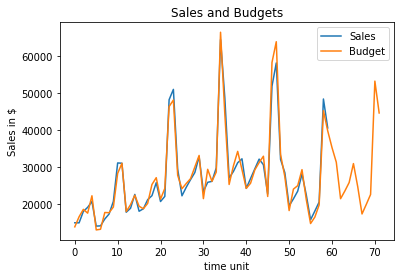

In [3]:
# plotting the sales out
sales_df = df[['Sales']];
budget_df = df[['Budget']];

plt.plot(sales_df, label='Sales');
plt.plot(budget_df, label='Budget');
plt.xlabel('time unit');
plt.ylabel('Sales in $');
plt.title('Sales and Budgets')
plt.legend();

In [4]:
sales_df = sales_df.dropna().to_numpy()
budget_df = budget_df.to_numpy()

In [5]:
iStartEnd = int(np.floor(0.8 * sales_df.shape[0]))
data_training = sales_df[np.arange(0, iStartEnd)]
data_testing = sales_df[np.arange(iStartEnd, sales_df.shape[0])]
data_training.shape

(48, 1)

In [6]:
data_testing.shape

(12, 1)

In [7]:
import tensorflow as tf

In [8]:
data_training = tf.keras.utils.normalize(data_training, axis=0, order=1)
data_testing = tf.keras.utils.normalize(data_testing, axis=0, order=1)

In [9]:
def generate_x_y(data, size, length):
    x_data = np.zeros((length - size, size), dtype=float)
    y_data = np.zeros((length - size, 1), dtype=float)
    for i in range(size-1, length):
        segment = data[np.arange(i - size, i)]
        x_data[i - size] = np.reshape(segment, (-1, 5))
        y_data[i - size] = data[i]
    return x_data, y_data

In [10]:
x_training, y_training = generate_x_y(data_training, 5, data_training.shape[0])
x_testing, y_testing = generate_x_y(data_testing, 5, data_testing.shape[0])

In [11]:
print("For example, the prediction of ", x_training[0], ', is ', y_training[0])

For example, the prediction of  [0.01129926 0.01128403 0.01364439 0.01448194 0.01568496] , is  [0.010614]


In [12]:
from tensorflow.keras import datasets, layers, models

my_model = models.Sequential([
    layers.Dense(5, input_shape=(5,)),
    layers.Dense(1)
])
    
my_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

my_model.fit(x_training, y_training, epochs=20, batch_size=512)

Train on 43 samples
Epoch 1/20
43/43 [==============================] - 0s 7ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/20
43/43 [==============================] - 0s 67us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/20
43/43 [==============================] - 0s 92us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/20
43/43 [==============================] - 0s 59us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/20
43/43 [==============================] - 0s 164us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/20
43/43 [==============================] - 0s 132us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/20
43/43 [==============================] - 0s 366us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 8/20
43/43 [==============================] - 0s 148us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 9/20
43/43 [==============================] - 0s 161us/sample - loss: 0.0000e+00 - accuracy: 0.0000

In [13]:
my_model.evaluate(x_testing, y_testing, batch_size=128)

7/7 [==============================] - 0s 10ms/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [14]:
old_length = sales_df.shape[0]
old_sales_df = sales_df
sales_df = np.append(sales_df, np.zeros(budget_df.shape[0] - sales_df.shape[0]))

In [15]:
for i in range(old_length, sales_df.shape[0]):
    sales_df[i] = my_model.predict(np.reshape(sales_df[i - 5:i], (1, 5)))[0, 0]

sales_df

array([14840.        , 14820.        , 17920.        , 19020.        ,
       20600.        , 13940.        , 14000.        , 15860.        ,
       17220.        , 20640.        , 31040.        , 30960.        ,
       17700.        , 18760.        , 22520.        , 17960.        ,
       18640.        , 21100.        , 22180.        , 25700.        ,
       20600.        , 21980.        , 48160.        , 50960.        ,
       29360.        , 22140.        , 24460.        , 26520.        ,
       28440.        , 32740.        , 23300.        , 25800.        ,
       26060.        , 29720.        , 64440.        , 48640.        ,
       26980.        , 28720.        , 31100.        , 32160.        ,
       24160.        , 26820.        , 29460.        , 32080.        ,
       30560.        , 22620.        , 51840.        , 58120.        ,
       32000.        , 28400.        , 19420.        , 21320.        ,
       23400.        , 28060.        , 22380.        , 15660.        ,
      

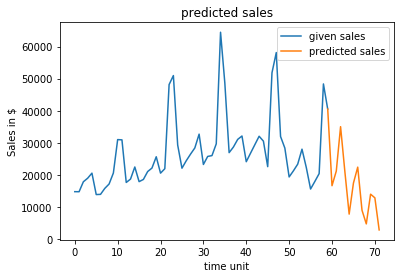

In [16]:
plt.plot(np.arange(old_sales_df.shape[0]), old_sales_df, label='given sales');
plt.plot(np.arange(old_sales_df.shape[0] - 1, sales_df.shape[0]), 
         sales_df[old_sales_df.shape[0] - 1: sales_df.shape[0]], label='predicted sales')
plt.xlabel('time unit');
plt.ylabel('Sales in $');
plt.title('predicted sales');
plt.legend();

Our prediction is **fair and reasonable**, as we do see decreasing sales with the given data. The general trend looks much like a concaved-down quadratic curve. And the parts we are predicting mostly lies on the decreasing part of the curve.

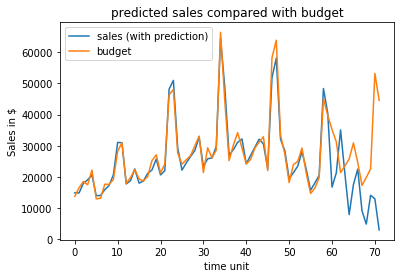

In [17]:
plt.plot(np.arange(sales_df.shape[0]), sales_df, label='sales (with prediction)');
plt.plot(np.arange(budget_df.shape[0]), budget_df, label='budget');
plt.xlabel('time unit');
plt.ylabel('Sales in $');
plt.title('predicted sales compared with budget');
plt.legend();

So, in conclusion, we **will not achieve our sales budget**, and is by a large amount.